In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
true_w.shape

Y = np.matmul(X,true_w) + np.random.randn(N)*0.5
Y

array([ 2.83259077,  2.65093746, -2.10495649, -4.07923636, -3.90636525,
        4.86514993, -5.19380589,  3.09243331, -4.20235411,  4.26106072,
        1.22848775, -0.60563498, -1.43924421,  0.17792128,  3.2038569 ,
       -2.50879865,  4.06268282, -1.50938283,  1.96378601,  3.71187479,
       -0.93749854, -7.1235451 ,  1.74760329,  2.86858648,  1.365733  ,
       -2.90134029,  3.61680002,  0.23163077, -3.74946043, -5.27513168,
       -4.98166745,  1.65478979, -2.92113914,  0.55982364,  0.26061631,
       -0.40772779,  1.41852087,  1.1997991 ,  5.70175031,  0.20720964,
       -0.97922234,  2.12933981,  4.40781436,  0.22115083,  0.02429325,
        0.88284961, -3.32324729,  6.92048903,  2.25214236,  1.81982391])

In [3]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 0.1 # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?

for t in range(500):
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)
print(w)

[ 1.07797339e+00  5.04384937e-01 -4.76206409e-01  1.50354800e-02
 -4.93234118e-02 -4.50791741e-02 -1.02422173e-02  6.77520941e-02
  7.87271603e-02 -1.67043255e-02  4.64202685e-03 -1.77825296e-02
  3.32063169e-03  7.55289082e-03  3.77559423e-02  3.97252900e-02
  3.52952050e-02 -1.84365577e-02 -2.71705515e-02 -7.47776388e-02
 -6.52389188e-02  5.11286491e-02  2.79839082e-02  7.36160078e-03
  4.64066771e-02 -7.16331107e-02  4.35695187e-02 -1.51200982e-02
  2.57501787e-02  1.86128319e-02 -1.35406560e-02  2.11867503e-02
  5.37527279e-02 -1.09889394e-02 -5.28688061e-02  1.47993213e-02
  1.54584313e-02 -1.65342695e-02 -6.09340233e-02 -2.22166223e-05
  1.12693561e-02  1.97174792e-03  3.62620378e-02 -2.61219330e-02
  6.47917492e-03  6.40347184e-02  4.50052283e-02  5.08523914e-02
 -1.09255278e-02  6.78990646e-03]


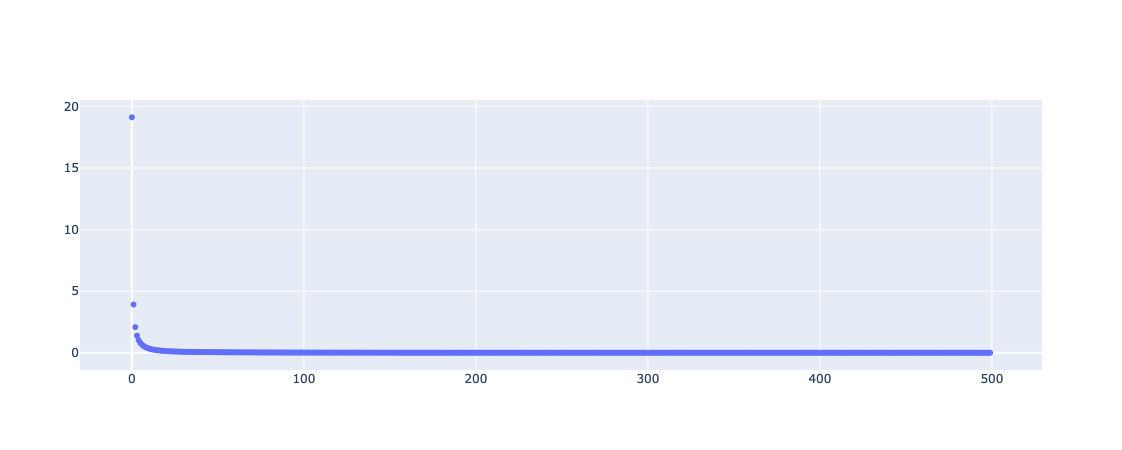

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(costs)),y=costs,mode ='markers'))
fig.show()

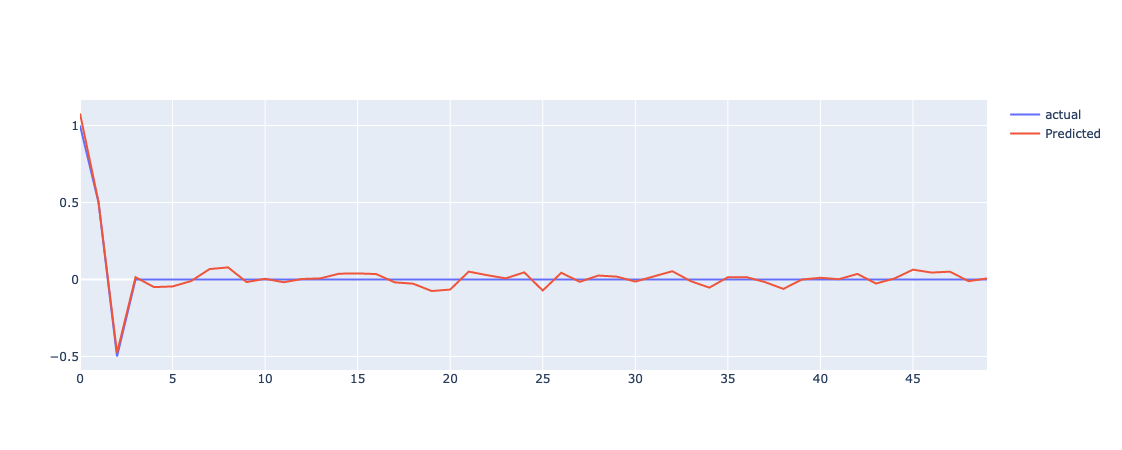

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(true_w)),y=true_w,mode ='lines',name = 'actual'))
fig.add_trace(go.Scatter(x=np.arange(0,len(w)),y=w,mode ='lines',name = 'Predicted'))
fig.show()